In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [117]:
cancer_df = pd.read_excel('Cancer.xls', index_col='age_groups')
hiv_df = pd.read_excel('AIDS.xls', index_col='years')
hiv_df.dropna(how='all', axis=0, inplace=True)
hiv_df.dropna(how='all', axis=1, inplace=True)
hiv_df.index = hiv_df.index.astype('int32')
hepatit_df = pd.read_excel('Hepatit B.xls', index_col='years')
hepatit_df.dropna(how='all', axis=0, inplace=True)
hepatit_df.index = hepatit_df.index.astype('int32')
uni_workers_df = pd.read_excel('University_workers.xls', index_col='Professions')

In [118]:
cancer_df

,women_total_percentage,men_total_percentage,women_percentage,men_percentage
age_groups,,,,
0-13,0.416262,0.885506,34.482759,65.517241
14-17,0.319134,0.326239,52.272727,47.727273
18-29,1.651172,1.724406,51.739130,48.260870
30-39,7.520466,4.054684,67.496887,32.503113
40-59,45.303177,37.284449,57.634598,42.365402
60+,44.789788,55.724716,47.366104,52.633896
"Cəmi, faizlə",100.000000,100.000000,52.821753,47.178247
nəfər,7207.000000,6437.000000,0.000000,0.000000


# Cancer data frame cleaning and modifing

In [119]:
women_count = cancer_df.iloc[:-2, 0] / 100 * cancer_df.iloc[-1, 0]
men_count = cancer_df.iloc[:-2, 1] / 100 * cancer_df.iloc[-1, 0]
cancer_df.drop(cancer_df.tail(2).index, axis=0, inplace=True)
cancer_df['women_count'] = women_count.astype('int')
cancer_df['men_count'] = men_count.astype('int')

In [120]:
uni_workers_df

,total_women_percentage,total_men_percentage,total_women_percentage.1,total_men_percentage.1
Professions,,,,
Uni_president,0.111566,0.625728,17.307692,82.692308
"Vice-rectors, branch directors",0.520640,2.211874,21.649485,78.350515
Laboratory and branch managers,4.388248,6.400000,44.194757,55.805243
Faculty_deans,0.830544,2.284633,29.910714,70.089286
Chair_heads,3.185819,7.974389,31.925466,68.074534
Professors from the department,2.318086,8.891153,23.433584,76.566416
Associate professors from the department,22.213958,28.390570,47.876035,52.123965
Head_teachers,28.288087,22.000000,60.211082,39.788918
"Teachers, assistents",38.200000,21.172875,67.894969,32.105031


In [121]:
uni_worker_women_count = uni_workers_df.iloc[:-2, 0] / 100 * uni_workers_df.iloc[-1, 0]
uni_worker_men_count = uni_workers_df.iloc[:-2, 1] / 100 * uni_workers_df.iloc[-1, 0]
uni_workers_df.drop(uni_workers_df.tail(2).index, axis=0, inplace=True)
uni_workers_df['women_count'] = uni_worker_women_count.astype('int')
uni_workers_df['men_count'] = uni_worker_men_count.astype('int')

In [122]:
cancer_df

,women_total_percentage,men_total_percentage,women_percentage,men_percentage,women_count,men_count
age_groups,,,,,,
0-13,0.416262,0.885506,34.482759,65.517241,30,63
14-17,0.319134,0.326239,52.272727,47.727273,23,23
18-29,1.651172,1.724406,51.739130,48.260870,119,124
30-39,7.520466,4.054684,67.496887,32.503113,542,292
40-59,45.303177,37.284449,57.634598,42.365402,3265,2687
60+,44.789788,55.724716,47.366104,52.633896,3228,4016


# Cancer Data Analysis

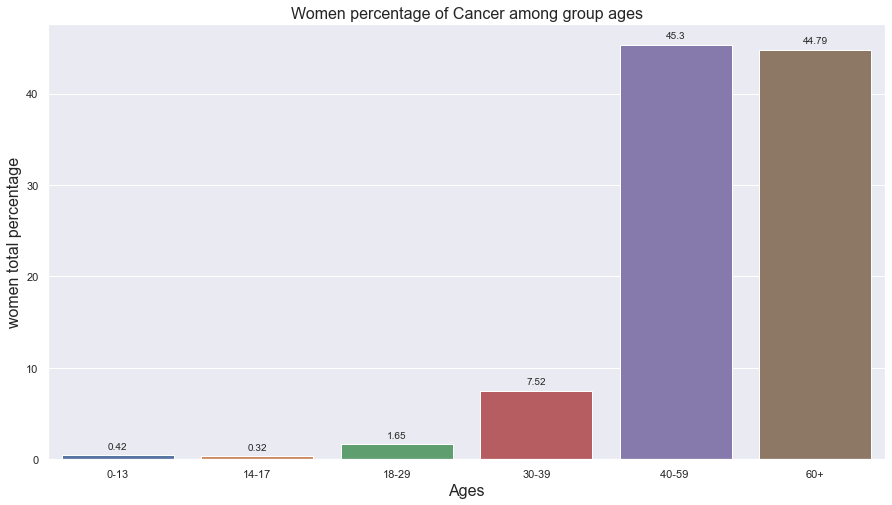

In [123]:
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=cancer_df.index.values,
                    y=round(cancer_df['women_total_percentage'], 2))
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Ages',fontsize=16)
plt.ylabel('women total percentage', fontsize=16)
plt.title('Women percentage of Cancer among group ages', fontsize=16)
plt.show()

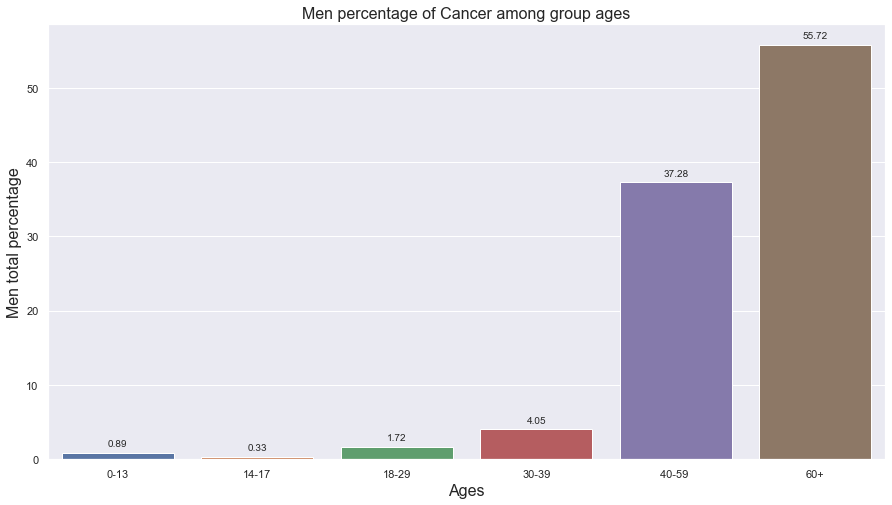

In [124]:
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=cancer_df.index.values,
                    y=round(cancer_df['men_total_percentage'], 2))
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Ages',fontsize=16)
plt.ylabel('Men total percentage', fontsize=16)
plt.title('Men percentage of Cancer among group ages', fontsize=16)
plt.show()

# HIV data frame cleaning and modifing

In [125]:
hiv_df['percentage_change_total'] = round(hiv_df['15-49 age infected people'].pct_change() * 100, 2)
hiv_df.replace(np.NaN, 0, inplace=True)

In [126]:
hiv_df

,15-49 age infected people,women_percentage,men_percentage,percentage_change_total
years,,,,
2010,459.0,20.700000,79.300000,0.00
2011,495.0,24.444444,75.555556,7.84
2012,458.0,31.004367,68.995633,-7.47
2013,453.0,36.203091,63.796909,-1.09
2014,509.0,37.721022,62.278978,12.36
2015,610.0,32.459016,67.540984,19.84
2016,465.0,35.698925,64.301075,-23.77
2017,477.0,37.100000,62.900000,2.58
2018,526.0,32.100000,67.900000,10.27


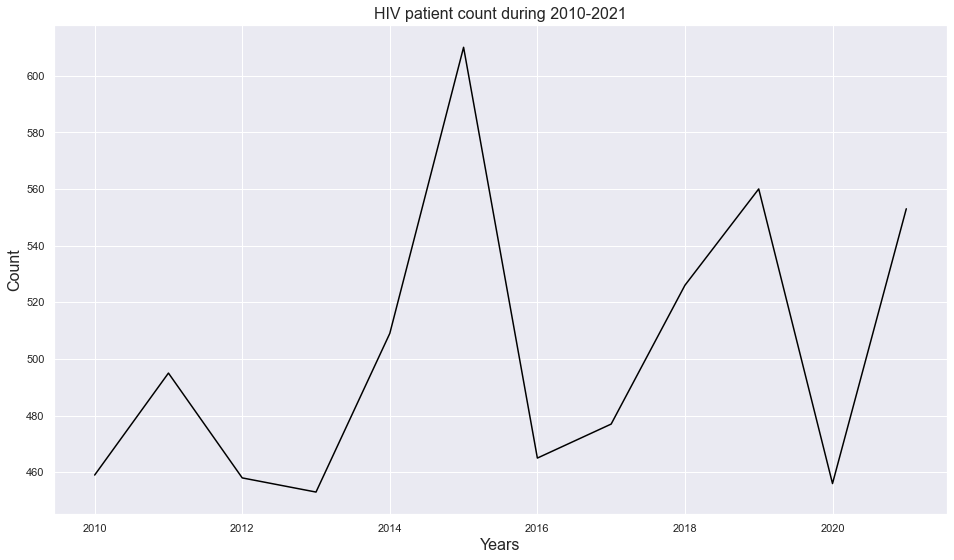

In [127]:
plt.figure(figsize=(16,9))
plt.plot(hiv_df.index.values, hiv_df['15-49 age infected people'], c='black')
plt.title('HIV patient count during 2010-2021', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Count', fontsize=16)
pass

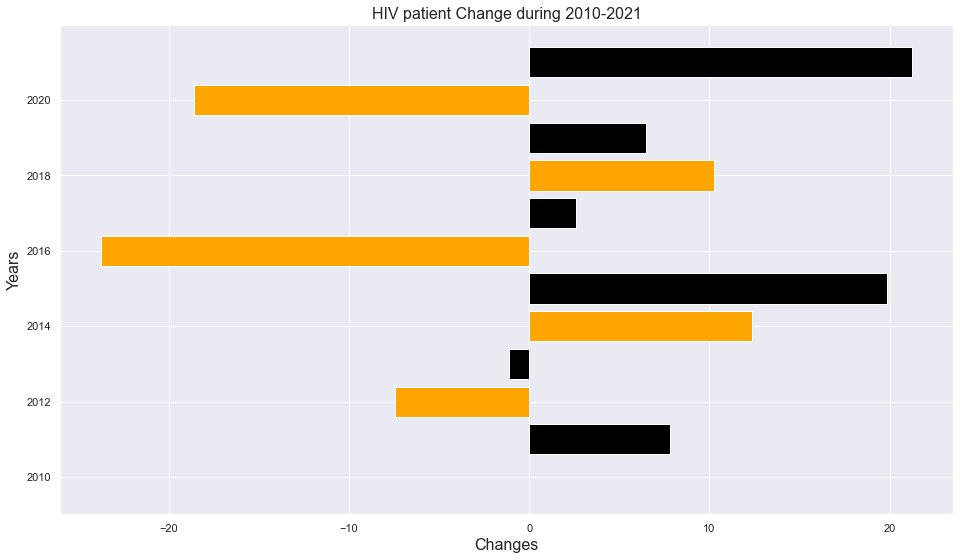

In [128]:
plt.figure(figsize=(16,9))
plt.barh(hiv_df.index.values, hiv_df['percentage_change_total'], color=['orange', 'black'])
plt.title('HIV patient Change during 2010-2021', fontsize=16)
plt.xlabel('Changes', fontsize=16)
plt.ylabel('Years', fontsize=16)
pass

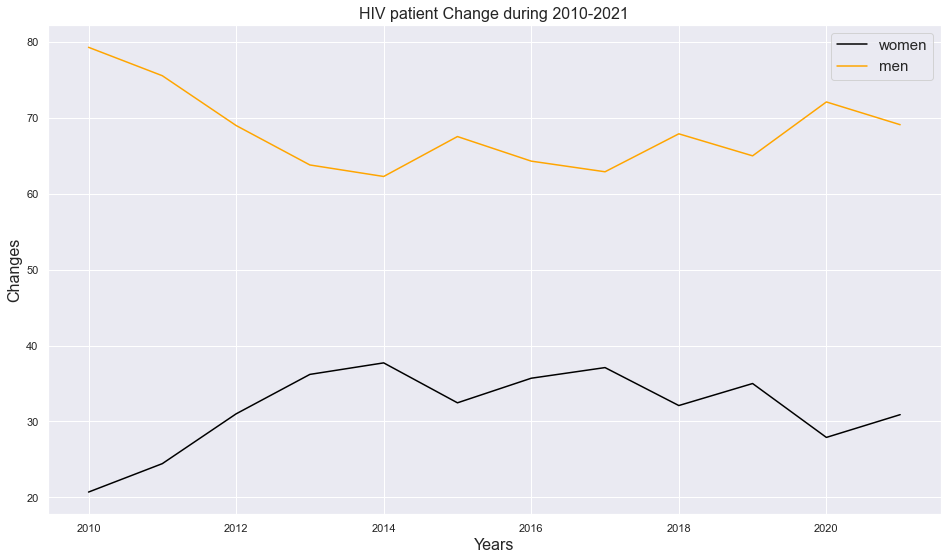

In [129]:
plt.figure(figsize=(16,9))
plt.plot(hiv_df.index.values, hiv_df['women_percentage'], color='black', label='women')
plt.plot(hiv_df.index.values, hiv_df['men_percentage'], color='orange', label='men')
plt.title('HIV patient Change during 2010-2021', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Changes', fontsize=16)
plt.legend(fontsize=15)
pass

# Hepatit Data Frame cleaning and modifying

In [130]:
hepatit_df

,women,men,women_percentage,men_percentage
years,,,,
2010,2.400000,5.9,28.9,71.1
2015,1.100000,1.9,36.6,63.4
2017,1.000000,2.3,31.2,68.8
2018,1.200000,1.6,44.2,55.8
2019,0.800000,2.3,26.3,73.7
2020,0.475041,1.5,24.5,75.5
2021,0.300000,0.8,29.3,70.7


In [131]:
hepatit_df['total_per_100k'] = hepatit_df['women'] + hepatit_df['men']

In [132]:
hepatit_df['percentage_change_total'] = round(hepatit_df['total_per_100k'].pct_change() * 100, 2)
hepatit_df.replace(np.NaN, 0, inplace=True)

In [133]:
hepatit_df['women'] = round(hepatit_df['women'],2)

In [134]:
hepatit_df

,women,men,women_percentage,men_percentage,total_per_100k,percentage_change_total
years,,,,,,
2010,2.40,5.9,28.9,71.1,8.300000,0.00
2015,1.10,1.9,36.6,63.4,3.000000,-63.86
2017,1.00,2.3,31.2,68.8,3.300000,10.00
2018,1.20,1.6,44.2,55.8,2.800000,-15.15
2019,0.80,2.3,26.3,73.7,3.100000,10.71
2020,0.48,1.5,24.5,75.5,1.975041,-36.29
2021,0.30,0.8,29.3,70.7,1.100000,-44.30


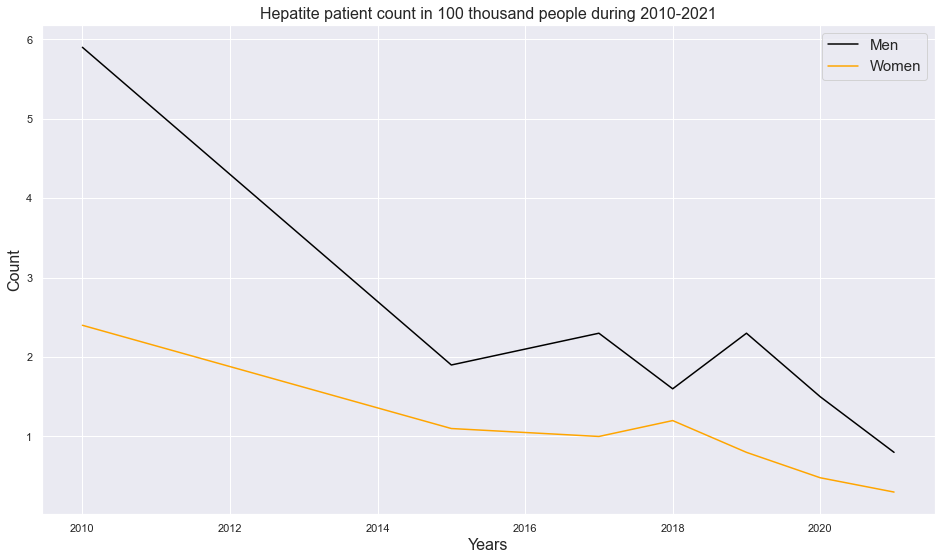

In [141]:
plt.figure(figsize=(16,9))
plt.plot(hepatit_df.index.values, hepatit_df['men'], c='black', label='Men')
plt.plot(hepatit_df.index.values, hepatit_df['women'], c='orange', label='Women')
plt.title('Hepatite patient count in 100 thousand people during 2010-2021', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(fontsize=15)
pass

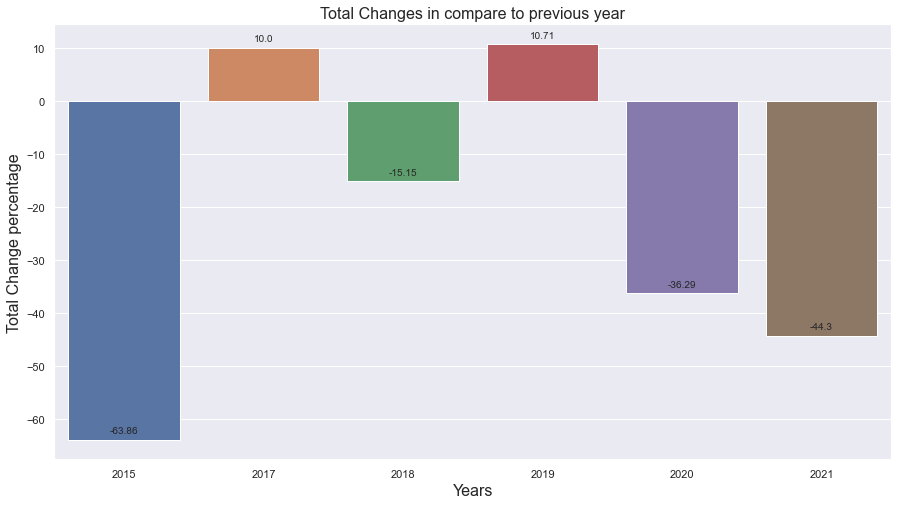

In [136]:
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=hepatit_df.index.values[1:],
                    y=round(hepatit_df[hepatit_df['percentage_change_total'] != 0]['percentage_change_total'], 2))
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Years',fontsize=16)
plt.ylabel('Total Change percentage', fontsize=16)
plt.title('Total Changes in compare to previous year', fontsize=16)
plt.show()

# Edication Workers

In [137]:
uni_workers_df

,total_women_percentage,total_men_percentage,total_women_percentage.1,total_men_percentage.1,women_count,men_count
Professions,,,,,,
Uni_president,0.111566,0.625728,17.307692,82.692308,9,50
"Vice-rectors, branch directors",0.520640,2.211874,21.649485,78.350515,42,178
Laboratory and branch managers,4.388248,6.400000,44.194757,55.805243,354,516
Faculty_deans,0.830544,2.284633,29.910714,70.089286,67,184
Chair_heads,3.185819,7.974389,31.925466,68.074534,257,643
Professors from the department,2.318086,8.891153,23.433584,76.566416,187,717
Associate professors from the department,22.213958,28.390570,47.876035,52.123965,1792,2290
Head_teachers,28.288087,22.000000,60.211082,39.788918,2282,1774
"Teachers, assistents",38.200000,21.172875,67.894969,32.105031,3081,1708


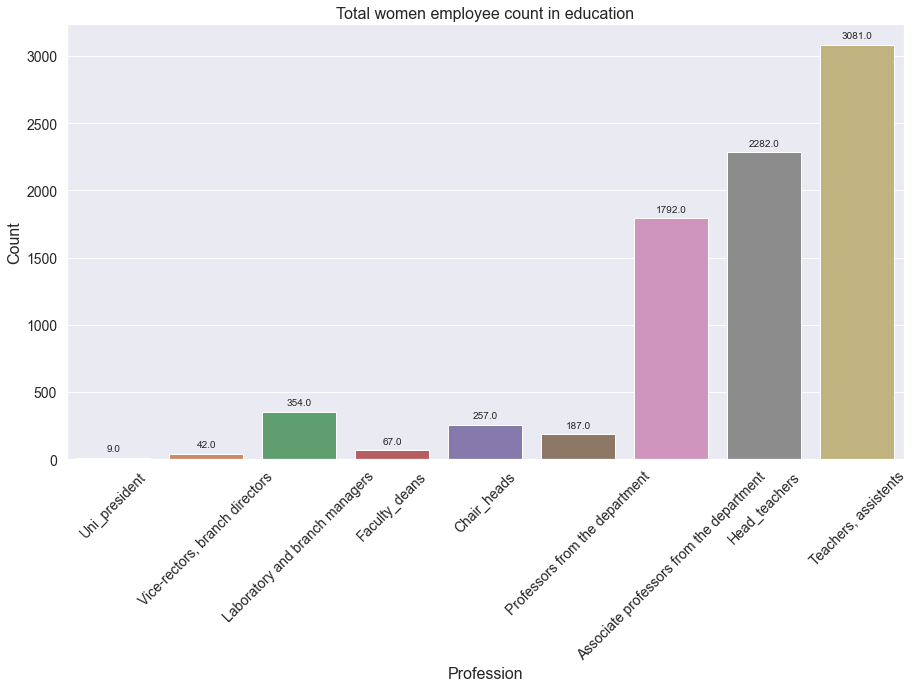

In [138]:
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=uni_workers_df.index.values,
                    y=uni_workers_df['women_count'])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Profession',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Total women employee count in education', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

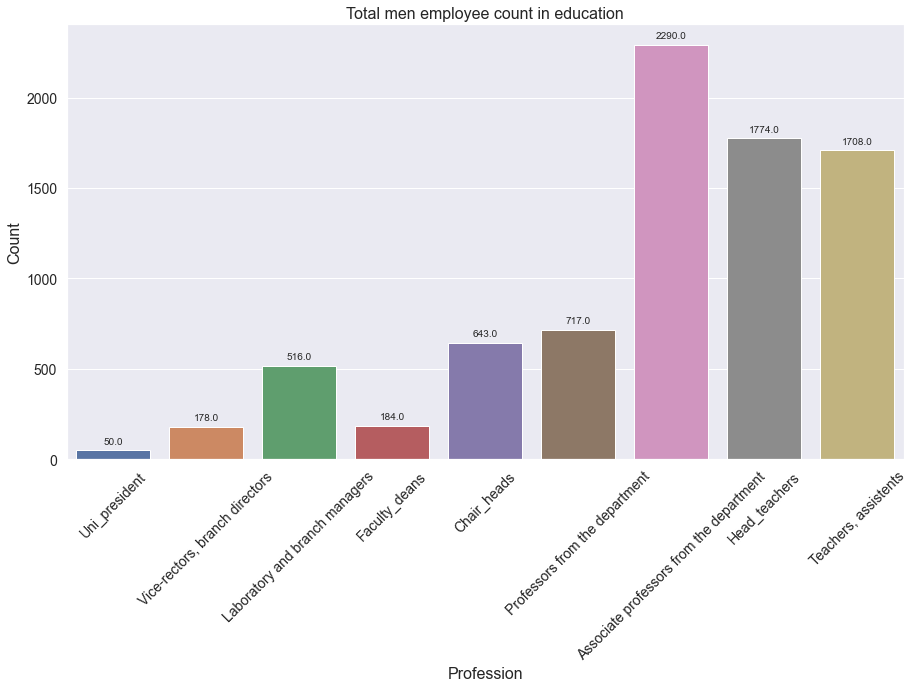

In [139]:
plt.figure(figsize=(15, 8))
splot = sns.barplot(x=uni_workers_df.index.values,
                    y=uni_workers_df['men_count'])
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Profession',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Total men employee count in education', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

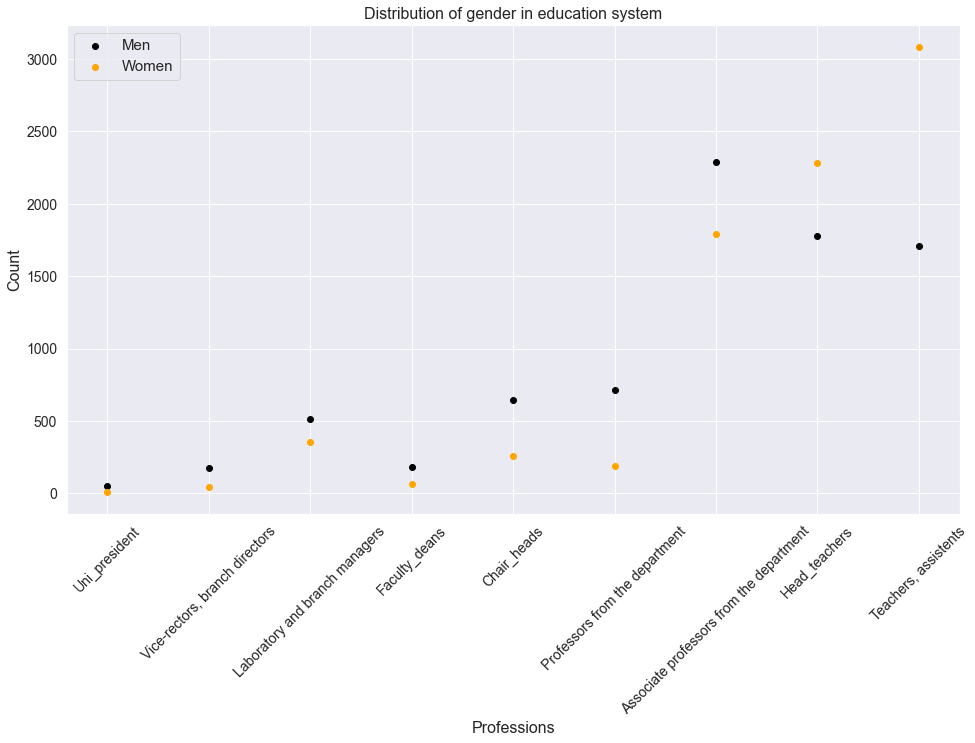

In [140]:
plt.figure(figsize=(16,9))
plt.scatter(uni_workers_df.index.values, uni_workers_df['men_count'], c='black', label='Men')
plt.scatter(uni_workers_df.index.values, uni_workers_df['women_count'], c='orange', label='Women')
plt.title('Distribution of gender in education system', fontsize=16)
plt.xlabel('Professions', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)
pass